In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
from collections import Counter


In [29]:
# Import the data
df = pd.read_csv("../data/artist_data.csv")  #..(relative path, goes to the parent directory) vs. C:Users (absolute path)

### Data cleaning 

In [30]:
# Set some global options so we always see all of the columns and rows when we print something out
pd.set_option('display.max_columns', 100) # 100 cols
pd.set_option('display.max_rows', 50) # 50 rows
print(df.head)

<bound method NDFrame.head of          id                    name  gender      dates  yearOfBirth   
0     10093  Abakanowicz, Magdalena  Female  born 1930       1930.0  \
1         0     Abbey, Edwin Austin    Male  1852–1911       1852.0   
2      2756        Abbott, Berenice  Female  1898–1991       1898.0   
3         1  Abbott, Lemuel Francis    Male  1760–1803       1760.0   
4       622          Abrahams, Ivor    Male  born 1935       1935.0   
...     ...                     ...     ...        ...          ...   
3527  12542         Zorio, Gilberto    Male  born 1944       1944.0   
3528   2186              Zox, Larry    Male  born 1936       1936.0   
3529    621   Zuccarelli, Francesco    Male  1702–1788       1702.0   
3530   2187        Zuloaga, Ignacio    Male  1870–1945       1870.0   
3531   2188         Zyw, Aleksander    Male  1905–1995       1905.0   

      yearOfDeath                    placeOfBirth            placeOfDeath   
0             NaN                       

<Axes: >

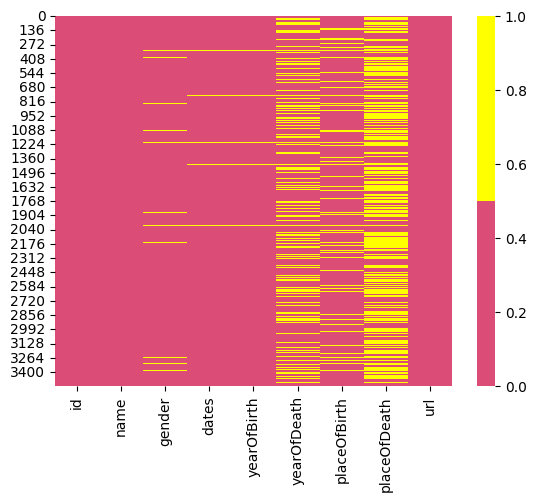

In [31]:
cols = df.columns[:30] # Select the first 30 columns
colours = ['#db4c77', '#ffff00'] # Specify the colours, where yellow is missing and pink is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours)) # Make a heatmap


Checking for unique values and spelling mistakes.


In [32]:
# Check unique values in the 'gender' column
unique_genders = df['gender'].unique()
print(unique_genders)

['Female' 'Male' nan]


Checking if the gender and the year of birth collum has any has outliers

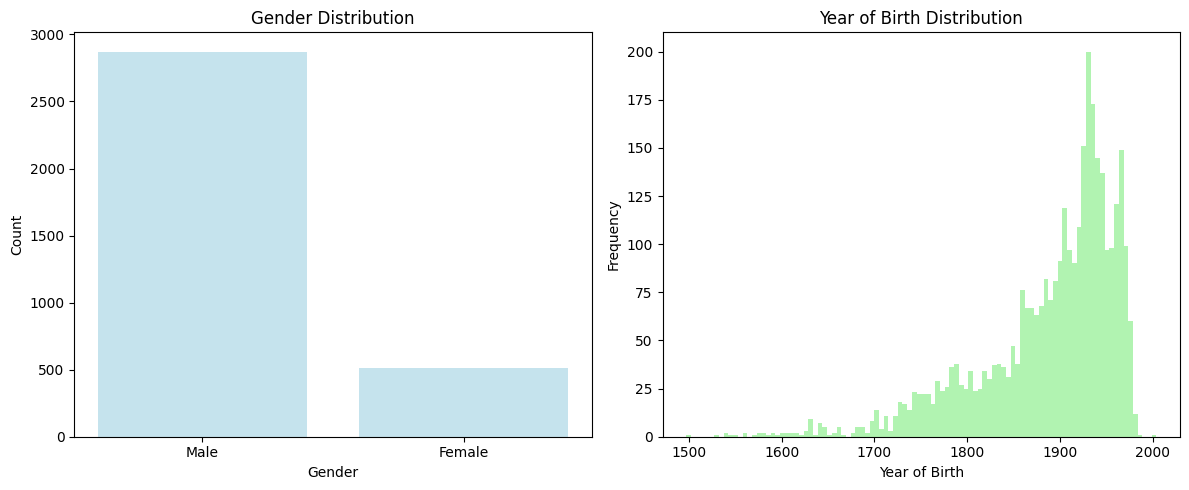

In [33]:
df = df.dropna(subset=['gender', 'yearOfBirth'])

# Create a figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Create the bar plot for 'gender' in the first subplot
gender_counts = df['gender'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values, color='#ADD8E6', alpha=0.7)
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Create the histogram for 'yearOfBirth' in the second subplot
axes[1].hist(df['yearOfBirth'], bins=100, color='#90EE90', alpha=0.7)
axes[1].set_title('Year of Birth Distribution')
axes[1].set_xlabel('Year of Birth')
axes[1].set_ylabel('Frequency')

# Display the figure with the plots
plt.tight_layout()
plt.show()

### Gender


Visualize gender and the relationship with the year of birth

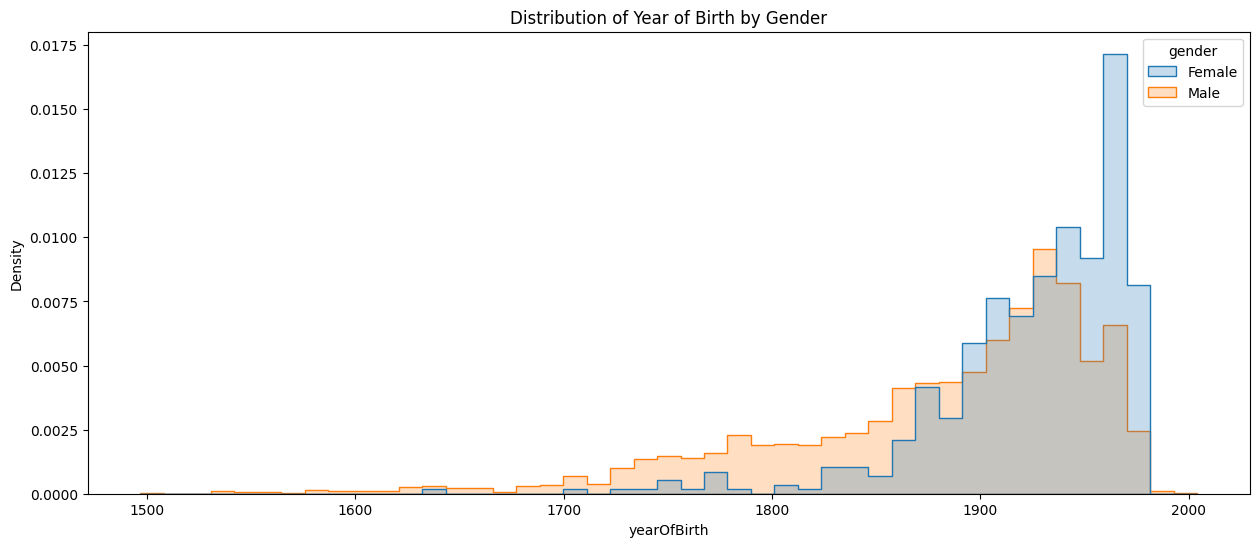

In [34]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x="yearOfBirth", hue="gender", element="step", stat="density", common_norm=False)
plt.title("Distribution of Year of Birth by Gender")
plt.show()

Looking at the names that does not have gender assinged to them.

In [44]:
# Display a small sample of the original DataFrame
print(df.head(60))


       id                    name  gender      dates  yearOfBirth   
0   10093  Abakanowicz, Magdalena  Female  born 1930       1930.0  \
1       0     Abbey, Edwin Austin    Male  1852–1911       1852.0   
2    2756        Abbott, Berenice  Female  1898–1991       1898.0   
3       1  Abbott, Lemuel Francis    Male  1760–1803       1760.0   
4     622          Abrahams, Ivor    Male  born 1935       1935.0   
..    ...                     ...     ...        ...          ...   
55   4427           Alÿs, Francis    Male  born 1959       1959.0   
56      7        Amiconi, Giacomo    Male  1682–1752       1682.0   
57    646             Amiet, Cuno    Male  1868–1961       1868.0   
58   7533        Amorales, Carlos    Male  born 1970       1970.0   
59    647      Amuchastegui, Axel    Male  1921–2002       1921.0   

    yearOfDeath                    placeOfBirth            placeOfDeath   
0           NaN                          Polska                     NaN  \
1        1911.0     P

In [40]:
# Create a boolean mask for rows where 'gender' is NaN
mask = df['gender'].isnull()

# Use the mask to filter the DataFrame
no_gender_info = df[mask]

# Display the filtered DataFrame
print(no_gender_info[['name', 'gender']])

Empty DataFrame
Columns: [name, gender]
Index: []
